***
# <font color=green size=10>**1ª ENTREGA DO PROJETO DATA SCIENCE APLICADO À SAÚDE**</font>
***

**>> Nome completo dos integrantes da equipe**

*Abrahão Picanço Neres de Oliveira e Lucas Gabriel Rocha Constancio*


**>> Tema do projeto**

*DIFERENÇAS REGIONAIS NA PREVALÊNCIA DA DESNUTRIÇÃO INFANTIL NO BRASIL*


**>> Banco de dados consultado**

*Estudo Nacional de Alimentação e Nutrição Infantil: ENANI-2019.*

*Link: https://opendatasus.saude.gov.br/dataset/estudo-nacional-de-alimentacao-e-nutricao-infantil-enani-2019*


**>> Banco de dados utilizado**

*Pasta com todos os arquivos usados para o projeto:*

*LINK: https://drive.google.com/drive/folders/1ZVu1o93VkY18xAumfjnTbRtxPycu_g0Q?usp=sharing*

## <font color=green size=6>**Desenvolvimento do projeto**</font>

**>> Problema a ser solucionado**

*Objetivo analisar as diferenças regionais na prevalência da desnutrição infantil no Brasil, identificando os determinantes socioeconômicos que influenciam essas disparidades. A pesquisa investigará como fatores como a ocupação dos pais, tipo de domicílio e acesso a alimentos adequados impactam o estado nutricional das crianças. Além disso, será analisada a relação entre as condições de infraestrutura dos domicílios, como acesso a cozinhas e o tipo de habitação, e a prevalência de desnutrição. O intuito é fornecer informações para a formulação de políticas públicas eficazes, visando reduzir as desigualdades regionais e melhorar a nutrição infantil no país.*

### **01. Importação de bibliotecas necessárias para o projeto.**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### **02. Importação do banco de dados original.**

Devido ao fato de o dataset apresentar mais de 14 mil linhas, torna-se inviável exibir a tabela completa diretamente aqui.

In [12]:
with open('/content/[1] Dataset_Original.csv', 'r') as file:
    lines = file.readlines()

for i, line in enumerate(lines[:20]):  # Analise as 20 primeiras linhas
    print(f"Linha {i+1}: {line}")


Linha 1: "a00_regiao";"a06_domicilio";"a11_situacao";"b00_numero";"b02_sexo";"b03_relacao";"b04_idade";"b05_data";"b05a_idade_em_meses";"b06_numero_mae";"b06a_porque";"b06b_mae_responsavel";"bb04_idade_da_mae";"bbb08_numero_mais_novo1";"bbb08a_numero_mais_velho1";"d01_cor";"d02_matriculado";"d03_duracao";"d04_refeicao";"d05_quais_refeicoes";"d05a_refeicao_outra";"d06_relacao_responsavel";"d06a_qual_outra";"datablb";"datahorapedido";"datahorapedido_r";"e01_leite_peito";"e02_agua";"e03_filtrada_fervida";"e04_agua_com_acucar";"e05_cha";"e06_leite_vaca_po";"e07_leite_vaca_liquido";"e08_leite_soja_po";"e09_leite_soja_liquido";"e10_formula_infantil";"e11_suco";"e12_fruta_inteira";"e13_fruta_vezes";"e14_manga";"e16_comida_sal";"e17_sal_vezes";"e18_oferecida";"e181_pedacos";"e182_amassada";"e183_peneira";"e184_liquidificada";"e185_caldo";"e189_nao_sabe";"e19_mingau";"e20_iogurte";"e21_arroz";"e211a_pao_frances";"e212a_feito_em_casa";"e213a_industrializado";"e214a_nao_comeu";"e219a_nao_sabe";"e

### **03. Pré-processamento dos dados para produzir o banco de dados para análise exploratória.**

In [ ]:
# Recomendamos que a equipe divida em várias células de código cada etapa do
# processamento e que utilize comentários para descrever cada etapa.


Este notebook realiza o carregamento de um dataset, selecionando apenas as colunas relevantes para a análise. Em seguida, procede com a remoção de colunas desnecessárias, o cálculo da porcentagem de dados ausentes e a formatação dos nomes das colunas. Por fim, gera um novo dataset com as variáveis selecionadas e.

In [22]:
# Lista de colunas que você deseja manter no dataset
colunas_que_eu_quero = [
    'a00_regiao', 'a06_domicilio', 'p03_ocupacao', 'a11_situacao', 'b00_numero', 'b02_sexo', 'b03_relacao',
    'b04_idade', 'b05_data', 'b05a_idade_em_meses', 'bb04_idade_da_mae', 'p02_tipo_de_domicilio', 'p06_cozinha',
    'h02_peso', 'h03_altura', 'h11_alergia', 'h13_diarreia', 'h14_tosse', 'h15_respiracao', 'e01_leite_peito',
    'e07_leite_vaca_liquido', 'e06_leite_vaca_po', 'e05_cha', 'e10_formula_infantil', 'e16_comida_sal',
    'e22_legumes', 'e26_feijao', 'e27_carne', 'e33_refrigerante', 'e31_salgadinhos', 'e35_biscoito',
    'l01_morador_alim_acabassem', 'l02_morador_alim_acabaram', 'l03_morador_saudavel', 'i004_2m_cabeca',
    'i028_6m_mao', 'vd_zhfa', 'vd_zwaz', 'vd_zimc', 'm03_alimentos_basicos'
]

In [23]:
# Carregar o dataset com as colunas selecionadas
dataset = pd.read_csv(
    r'/content/[1] Dataset_Original.csv',
    on_bad_lines='skip', sep=';', usecols=colunas_que_eu_quero
)

In [24]:
# Exibir as colunas do dataset para verificação
print(dataset.columns)

Index(['a00_regiao', 'a06_domicilio', 'a11_situacao', 'b00_numero', 'b02_sexo',
       'b03_relacao', 'b04_idade', 'b05_data', 'b05a_idade_em_meses',
       'bb04_idade_da_mae', 'e01_leite_peito', 'e05_cha', 'e06_leite_vaca_po',
       'e07_leite_vaca_liquido', 'e10_formula_infantil', 'e16_comida_sal',
       'e22_legumes', 'e26_feijao', 'e27_carne', 'e31_salgadinhos',
       'e33_refrigerante', 'e35_biscoito', 'h02_peso', 'h03_altura',
       'h11_alergia', 'h13_diarreia', 'h14_tosse', 'h15_respiracao',
       'i004_2m_cabeca', 'i028_6m_mao', 'l01_morador_alim_acabassem',
       'l02_morador_alim_acabaram', 'l03_morador_saudavel',
       'm03_alimentos_basicos', 'p02_tipo_de_domicilio', 'p03_ocupacao',
       'p06_cozinha', 'vd_zwaz', 'vd_zimc', 'vd_zhfa'],
      dtype='object')


In [25]:
# Exibir as primeiras 5 linhas do dataset
print(dataset.head(5))

  a00_regiao  a06_domicilio a11_situacao  b00_numero   b02_sexo  \
0      Norte            NaN       Urbano           2  Masculino   
1      Norte            NaN       Urbano           3   Feminino   
2      Norte            NaN       Urbano           2   Feminino   
3      Norte            NaN       Urbano           3  Masculino   
4      Norte            NaN       Urbano           2   Feminino   

            b03_relacao  b04_idade  b05_data b05a_idade_em_meses  \
0  Filho(a), enteado(a)          1  11092017            22 meses   
1  Filho(a), enteado(a)          4   6042015            51 meses   
2  Filho(a), enteado(a)          2  21122016            30 meses   
3  Filho(a), enteado(a)          4  13112014            56 meses   
4  Filho(a), enteado(a)          0   2092018            10 meses   

   bb04_idade_da_mae  ... l01_morador_alim_acabassem  \
0               27.0  ...                        Sim   
1               27.0  ...                        Sim   
2               22.0

In [26]:
# Função para "embelezar" os nomes das colunas
def embelezar(nome_coluna: str):
    return str.join(" ", nome_coluna.split("_")[1:]).capitalize()

In [27]:
# Aplicar a função de embelezamento (exemplo de uso para uma coluna)
col = "bb04_idade_da_mae"
print(embelezar(col))

Idade da mae


In [28]:
# Calcular a porcentagem de dados faltantes por coluna
percent_faltante = (dataset.isnull().sum() / len(dataset)) * 100
print(percent_faltante)

a00_regiao                      0.000000
a06_domicilio                 100.000000
a11_situacao                    0.000000
b00_numero                      0.000000
b02_sexo                        0.000000
b03_relacao                     0.000000
b04_idade                       0.000000
b05_data                        0.000000
b05a_idade_em_meses             0.000000
bb04_idade_da_mae               0.075560
e01_leite_peito                 0.000000
e05_cha                         0.000000
e06_leite_vaca_po               0.000000
e07_leite_vaca_liquido          0.000000
e10_formula_infantil            0.000000
e16_comida_sal                  0.000000
e22_legumes                     0.000000
e26_feijao                      0.000000
e27_carne                       0.000000
e31_salgadinhos                 0.000000
e33_refrigerante                0.000000
e35_biscoito                    0.000000
h02_peso                        0.000000
h03_altura                      0.000000
h11_alergia     

In [29]:
# Remover colunas desnecessárias
colunas_n_quero = ['i004_2m_cabeca', 'i028_6m_mao', 'a06_domicilio']
dataset = dataset.drop(columns=colunas_n_quero)

In [30]:
# Lista das variáveis finais que você quer manter no novo dataset
variaveis_selecionadas = [
    "a00_regiao", "b02_sexo", "b04_idade", "b05_data", "b05a_idade_em_meses", "l01_morador_alim_acabassem",
    "l02_morador_alim_acabaram", "p02_tipo_de_domicilio", "p06_cozinha", "p03_ocupacao", "a11_situacao",
    "h14_tosse", "h15_respiracao", "m03_alimentos_basicos"
]


In [31]:
# Criar um novo DataFrame com as variáveis selecionadas
novo_dataset = dataset[variaveis_selecionadas]

In [32]:
# Exibir o novo dataset
novo_dataset.head(5)

,a00_regiao,b02_sexo,b04_idade,b05_data,b05a_idade_em_meses,l01_morador_alim_acabassem,l02_morador_alim_acabaram,p02_tipo_de_domicilio,p06_cozinha,p03_ocupacao,a11_situacao,h14_tosse,h15_respiracao,m03_alimentos_basicos
0,Norte,Masculino,1,11092017,22 meses,Sim,Não,Apartamento,Sim,Cedido de outra forma,Urbano,Sim,Não,"Sim, sempre"
1,Norte,Feminino,4,6042015,51 meses,Sim,Não,Apartamento,Sim,Cedido de outra forma,Urbano,Sim,Não,"Sim, sempre"
2,Norte,Feminino,2,21122016,30 meses,Sim,Sim,Casa,Sim,Cedido de outra forma,Urbano,Não,Não,"Sim, quase sempre"
3,Norte,Masculino,4,13112014,56 meses,Sim,Sim,Casa,Sim,Cedido de outra forma,Urbano,Não,Não,"Sim, quase sempre"
4,Norte,Feminino,0,2092018,10 meses,Sim,Não,Casa,Não,Próprio de algum morador - já pago,Urbano,Sim,Não,"Sim, quase sempre"


## LEGENDAS

*Região* = Macrorregião

*Sexo* = Sexo da criança

*Idade* = Idade em anos completos da criança

*Data de Nascimento* = Data de nascimento da criança

*Idade em Meses* = Idade em meses da criança

*Moradores que Alimentaram Acabamento (Sim)* = Os moradores tiveram a preocupação de que os alimentos acabassem antes de poderem comprar ou receber mais comida

*Moradores que Alimentaram Acabamento (Não)* = Os alimentos acabaram antes que os moradores tivessem dinheiro para comprar mais comida

*Tipo de Domicílio* = Tipo de domicílio

*Possui Cozinha* = O domicílio tem cozinha

*Ocupação* = Tipo de ocupação do domicílio

*Situação do Registro* = Situação do setor do domicílio

*Presença de Tosse* = A criança está ou esteve com tosse nos últimos 15 dias

*Tipo de Respiração* = A criança está ou esteve com respiração difícil nos últimos 15 dias

*Alimentos Básicos* = Quando cozinha em casa, você utiliza principalmente alimentos básicos, por exemplo: arroz, feijão, legumes, verduras, carnes, ovos, temperos naturais?

In [ ]:
# Dicionário para renomear as colunas
novos_nomes = {
    'a00_regiao': 'Região',
    'b02_sexo': 'Sexo',
    'b04_idade': 'Idade',
    'b05_data': 'Data de Nascimento',
    'b05a_idade_em_meses': 'Idade em Meses',
    'l01_morador_alim_acabassem': 'Moradores que Alimentaram Acabamento (Sim)',
    'l02_morador_alim_acabaram': 'Moradores que Alimentaram Acabamento (Não)',
    'p02_tipo_de_domicilio': 'Tipo de Domicílio',
    'p06_cozinha': 'Possui Cozinha',
    'p03_ocupacao': 'Ocupação',
    'a11_situacao': 'Situação do Registro',
    'h14_tosse': 'Presença de Tosse',
    'h15_respiracao': 'Tipo de Respiração',
    'm03_alimentos_basicos': 'Alimentos Básicos'
}

# Renomeando as colunas
novo_dataset.rename(columns=novos_nomes, inplace=True)

# Salvar o dataset filtrado em um novo arquivo CSV
novo_dataset.to_csv("[2]Dataset_limpo.csv", index=False)

# Exibindo o DataFrame com os novos nomes
novo_dataset.head(5)



In [48]:
data = novo_dataset.copy()

### A maioria das colunas possui valores categóricos, que podem ser analisados por meio de contagens e distribuições.

### **04. Análise Exploratória de Dados.**





In [49]:
# 1. Medidas de Tendência Central - Idade
media_idade = data['Idade'].mean()
mediana_idade = data['Idade'].median()

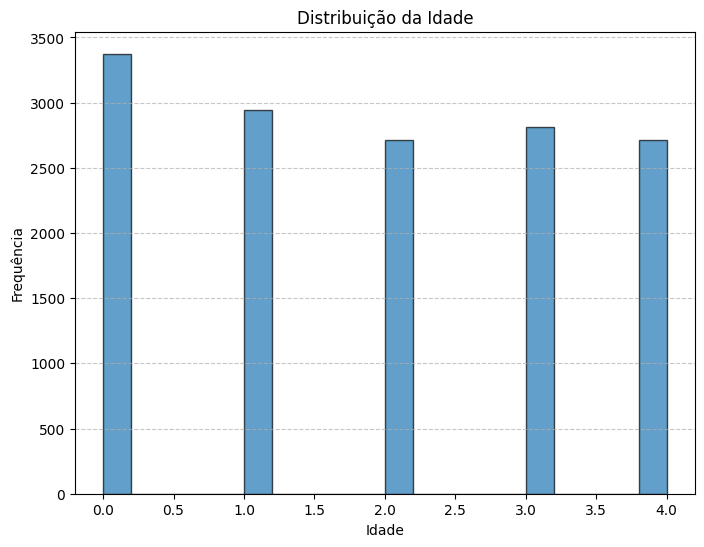

In [50]:
# Gráficos
# 1. Histograma da Idade
plt.figure(figsize=(8, 6))
data['Idade'].plot(kind='hist', bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [51]:
# 2. Medidas de Dispersão - Idade
desvio_padrao_idade = data['Idade'].std()
amplitude_idade = data['Idade'].max() - data['Idade'].min()

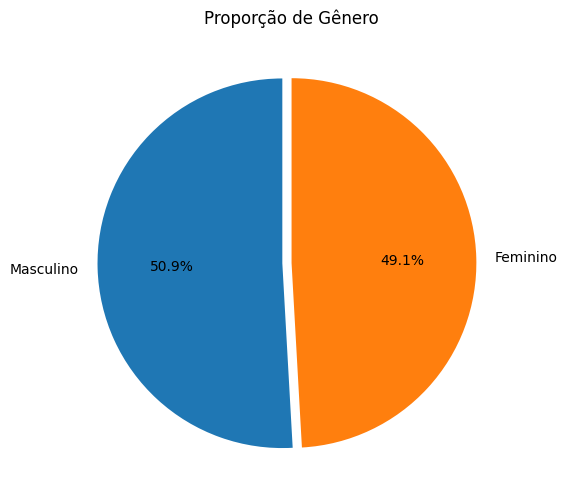

In [52]:
# 2. Gráfico de Barras para Proporção de Gênero
plt.figure(figsize=(6, 6))
data['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0.05, 0))
plt.title('Proporção de Gênero')
plt.ylabel('')
plt.show()

In [53]:
# 3. Medidas de Contagem e Proporção
frequencia_genero = data['Sexo'].value_counts()
percentual_genero = data['Sexo'].value_counts(normalize=True) * 100

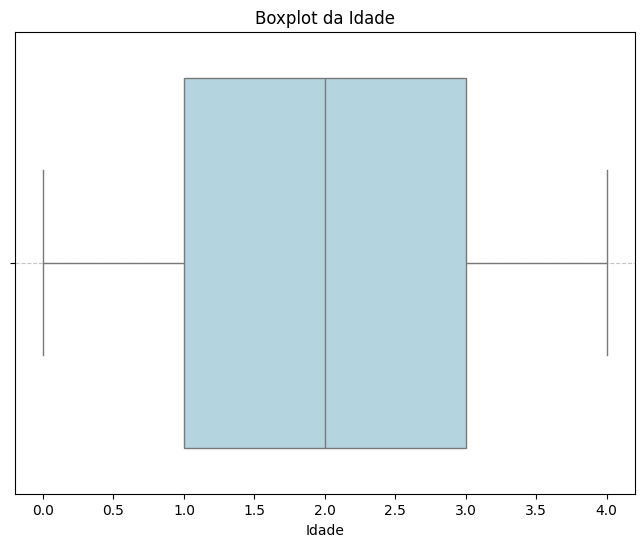

In [54]:
# 3. Boxplot da Idade
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Idade'], color='lightblue')
plt.title('Boxplot da Idade')
plt.xlabel('Idade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

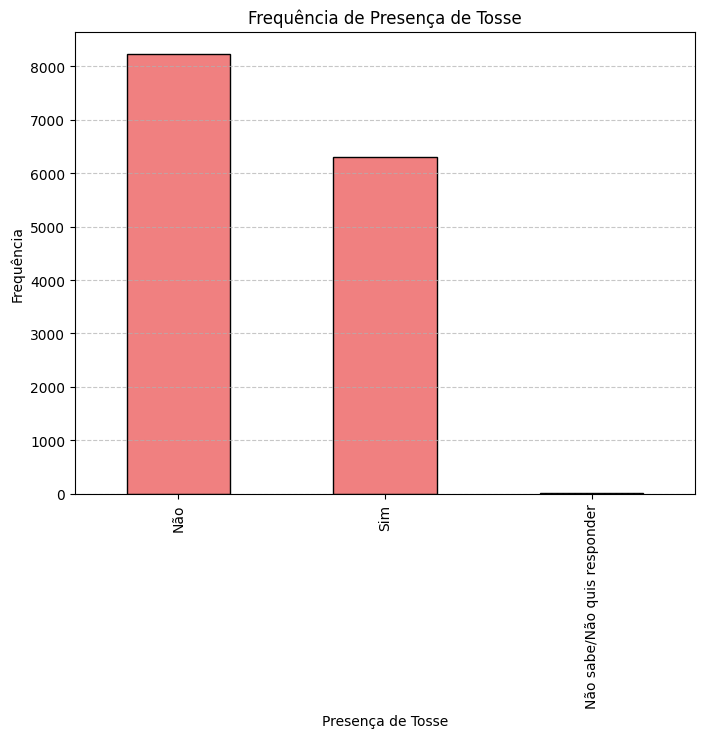

In [61]:
# 4. Gráfico de Barras para Presença de Tosse
plt.figure(figsize=(8, 6))
data['Presença de Tosse'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Frequência de Presença de Tosse')
plt.xlabel('Presença de Tosse')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [57]:
# 5. Frequência de Tipo de Domicílio e Presença de Tosse
frequencia_domicilio = data['Tipo de Domicílio'].value_counts()
frequencia_tosse = data['Presença de Tosse'].value_counts()

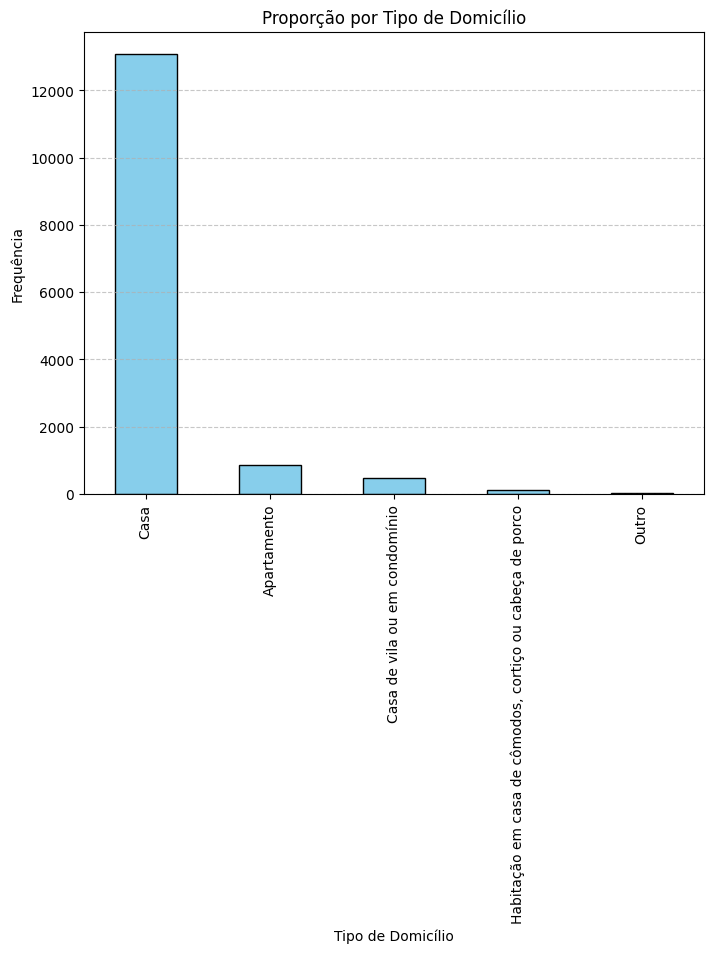

In [58]:
# 5. Gráfico de Barras para Tipo de Domicílio
plt.figure(figsize=(8, 6))
data['Tipo de Domicílio'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Proporção por Tipo de Domicílio')
plt.xlabel('Tipo de Domicílio')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

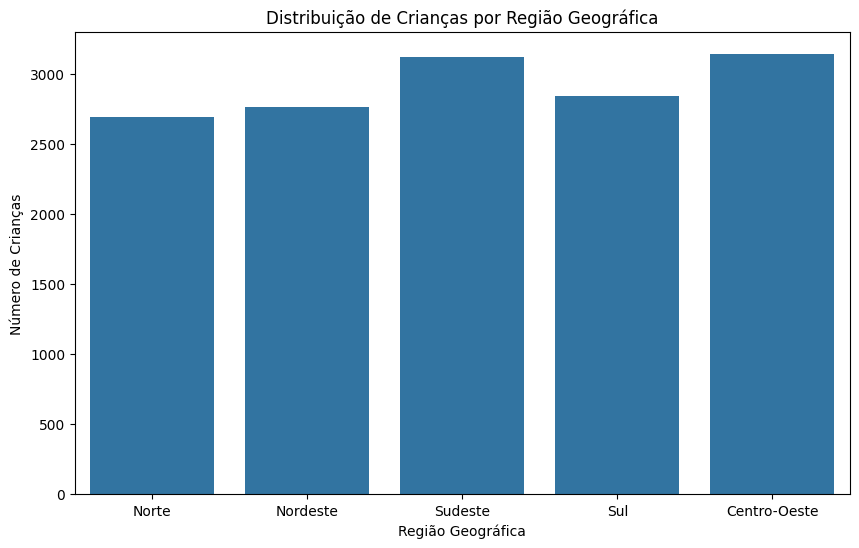

In [65]:
#Gráfico 6: Distribuição de Crianças por Região Geográfica
plt.figure(figsize=(10, 6))
sns.countplot(x='a00_regiao', data=dataset)
plt.title('Distribuição de Crianças por Região Geográfica')
plt.xlabel('Região Geográfica')
plt.ylabel('Número de Crianças')
plt.show()

## <font color=green size=6>**Esclarecimentos e Requisitos do projeto**</font>

1. Este projeto precisa começar pela definição de um tema. Por exemplo: arboviroses no Brasil.


2. A partir do tema, a equipe deve identificar um banco de dados ou dataset, preferencialmente, utilizando dados reais.


3. Com base na relação entre o tema e os dados identificados, a equipe deve identificar um problema a ser solucionado. Por exemplo: identificar as principais condutas das pessoas que podem prevenir a piora de um quadro de arbovirose. É preciso que esse problema seja passível de solução por meio do banco de dados escolhido pela equipe.


4. A equipe deve pré-processar o banco de dados identificado.
- 4.1. Provavelmente, nem todas as colunas (variáveis / features) presentes no banco serão necessárias para a solução do problema que a equipe escolheu para lidar.
- 4.2 Da mesma forma, nem todas as linhas do banco (relacionadas a dados como os de participantes de uma pesquisa) podem ser necessárias. Por exemplo: algumas linhas podem ter muitos dados nulos, que pode ser útil simplesmente excluir. Outro exemplo: o estudo que a equipe escolheu envolve apenas a saúde da mulher, permitindo a exclusão dos dados dos homens.
- 4.3. Por fim, é possível que existam dados inconsistentes e que precisam ser corrigidos ou dados com texto e que devem ser transformados em números, se o que se espera é que sejam processados estatisticamente.


5. Com o banco de dados em condições de processamento, é necessário conduzir uma Análise Exploratória de Dados. Isso significa utilizar bibliotecas do python que permitiu calcular estatísticas descritivas.
- 5.1. Considere as seguintes estatísticas: medidas de tendência central (ex.: média), medidas de dispersão (ex.: desvio-padrão), medidas de contagem e proporção (ex.: frequência, percentual), medidas de associação (ex.: correlação de pearson).
- 5.2. Considere os seguintes gráficos: histograma, gráfico de barras, boxplot.
- 5.3. Você deve apresentar neste notebook 05 estatísticas descritivas e 05 gráficos relacionados ao banco de dados pré-processado e que ajudem a caracterizar os seus dados, te aproximando da solução do problema que a equipe selecionou.


6. Esta entrega deve ocorrer até o dia 12/12/2024.

*A título de informação, lembramos que a 2ª entrega deste projeto será um modelo de IA, que ajude a solucionar o problema que a equipe escolheu e a última entrega será um dashboard unindo as estatísticas da 1ª entrega com o modelo da 2ª entrega.*